# CUSTOMER CHURN PREDICTION

In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle as pk

In [210]:
data=pd.read_csv('Churn_Modelling.csv')

In [211]:
data.shape

(10000, 14)

In [212]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [214]:
for col in data.columns:
    print(f"{col}: {data[col].nunique()}")

RowNumber: 10000
CustomerId: 10000
Surname: 2932
CreditScore: 460
Geography: 3
Gender: 2
Age: 70
Tenure: 11
Balance: 6382
NumOfProducts: 4
HasCrCard: 2
IsActiveMember: 2
EstimatedSalary: 9999
Exited: 2


In [215]:
for col in data.columns:
    print(f"{col}: {data[col].isnull().sum()}")

RowNumber: 0
CustomerId: 0
Surname: 0
CreditScore: 0
Geography: 0
Gender: 0
Age: 0
Tenure: 0
Balance: 0
NumOfProducts: 0
HasCrCard: 0
IsActiveMember: 0
EstimatedSalary: 0
Exited: 0


In [216]:
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [217]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [218]:
non_numeric_cols =data.select_dtypes(include=['object', 'category', 'datetime']).columns
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: Index(['Geography', 'Gender'], dtype='object')


In [219]:
print(data["Exited"].value_counts())

Exited
0    7963
1    2037
Name: count, dtype: int64


In [220]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


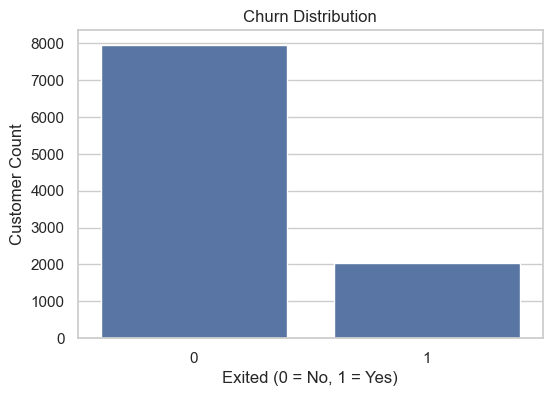

In [221]:
plt.figure(figsize=(6,4))
sns.countplot(x="Exited", data=data)
plt.title("Churn Distribution")
plt.xlabel("Exited (0 = No, 1 = Yes)")
plt.ylabel("Customer Count")
plt.show()

In [222]:
def plot_histogram(data,column_name):
    plt.figure(figsize=(5, 3))
    sns.histplot(data[column_name], kde=True)
    plt.title(f"Distribution of {column_name}")
    
    col_mean = data[column_name].mean()
    col_median = data[column_name].median()
    
    plt.axvline(col_mean, color="red", linestyle="-", label="Mean")
    plt.axvline(col_median, color="green", linestyle="--", label="Median")
    
    plt.legend()
    plt.show()


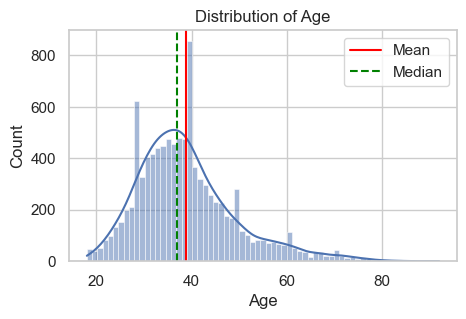

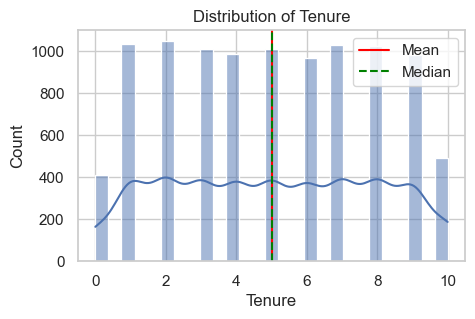

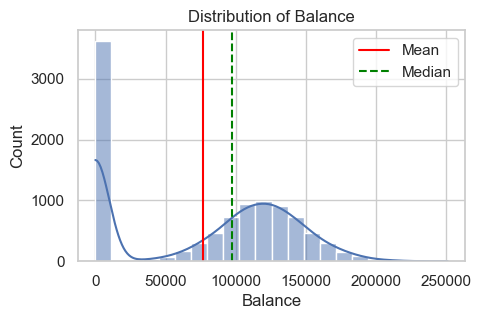

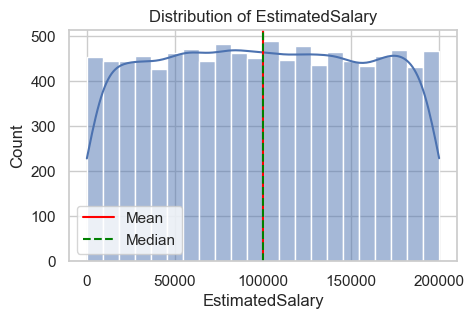

In [223]:
for col in ['Age', 'Tenure', 'Balance', 'EstimatedSalary']:
    plot_histogram(data, col)

In [224]:
def plot_boxplot(data, column_name):
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=data[column_name])
    plt.title(f"Box Plot of {column_name}")
    plt.show()

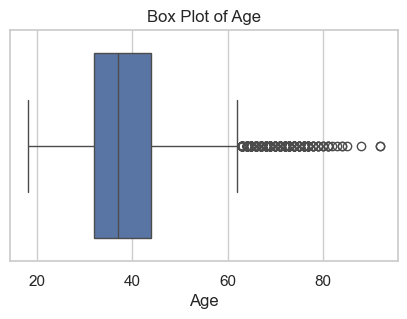

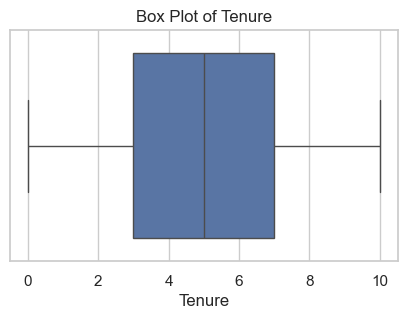

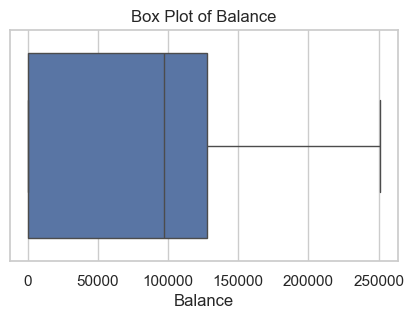

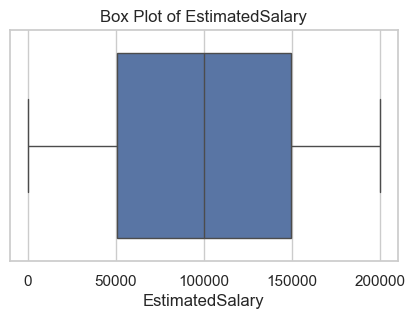

In [225]:
for col in ['Age', 'Tenure', 'Balance', 'EstimatedSalary']:
    plot_boxplot(data, col)

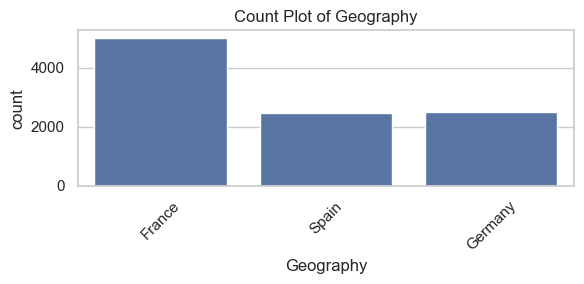

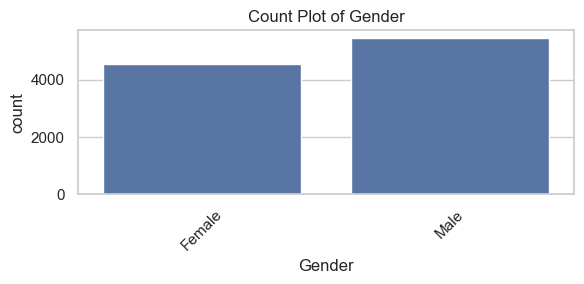

In [226]:
for col in non_numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=data[col])
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [227]:
le = LabelEncoder()
data['Geography'] = le.fit_transform(data['Geography'])
data['Gender'] = le.fit_transform(data['Gender'])


In [228]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


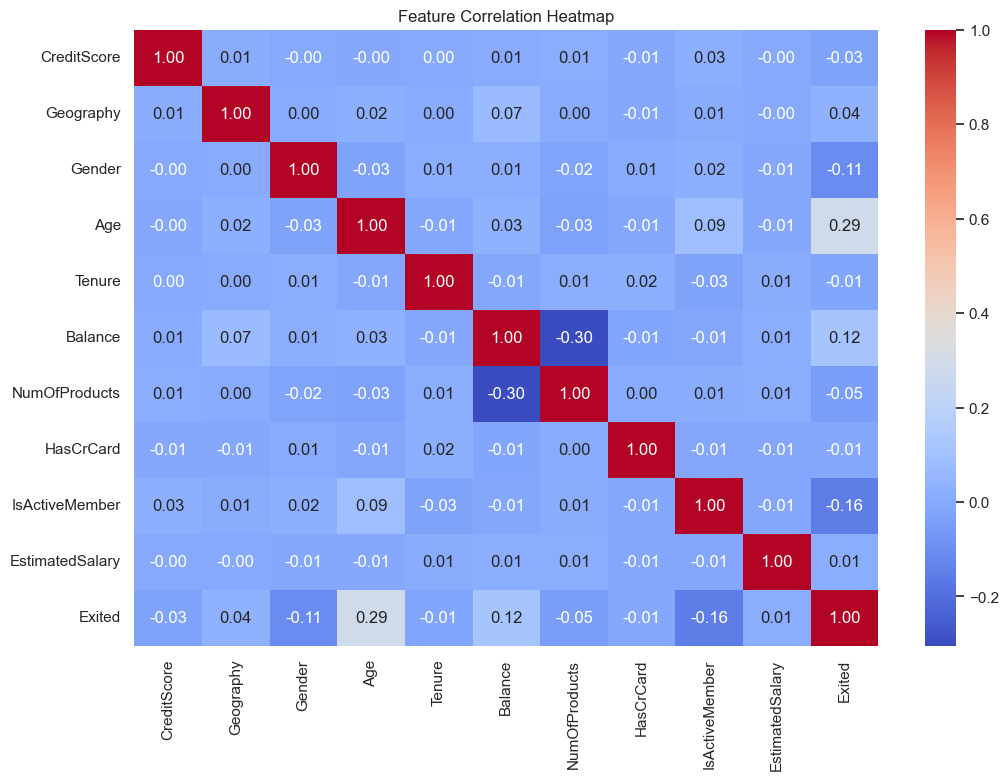

In [229]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [230]:
X = data.drop(columns=["Exited"])
y = data["Exited"]

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [232]:
print(y_train.shape)

(8000,)


In [233]:
print(y_train.value_counts())

Exited
0    6356
1    1644
Name: count, dtype: int64


### Synthetic Minority Over-sampling Technique(SMOTE)

In [234]:
smote = SMOTE(random_state=42)

In [235]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [236]:
print(y_train_smote.shape)

(12712,)


In [237]:
print(y_train_smote.value_counts())

Exited
0    6356
1    6356
Name: count, dtype: int64


In [238]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

In [239]:
cv_scores = {}
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters")
  scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
  print("-"*70)

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.79
----------------------------------------------------------------------
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.85
----------------------------------------------------------------------


In [240]:
cv_scores

{'Decision Tree': array([0.72316162, 0.79276445, 0.81549961, 0.80802518, 0.8202203 ]),
 'Random Forest': array([0.75776642, 0.85922139, 0.88552321, 0.87844217, 0.89299764])}

In [241]:
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt", "log2"]
}

In [242]:
rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)

In [243]:
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring="f1", 
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1', verbose=1)

In [244]:
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

best_rf = grid_search.best_estimator_

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Score: 0.8515340776385131


In [245]:
best_rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [246]:
print(y_test.value_counts())

Exited
0    1607
1     393
Name: count, dtype: int64


In [247]:
y_test_pred = best_rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy: 0.8225
Confusion Matrix:
 [[1387  220]
 [ 135  258]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.89      1607
           1       0.54      0.66      0.59       393

    accuracy                           0.82      2000
   macro avg       0.73      0.76      0.74      2000
weighted avg       0.84      0.82      0.83      2000



In [248]:
with open("random_forest_model.pkl", "wb") as file:
    pk.dump(best_rf, file)